# Exercise 1: Computing Camera Extrinsics

In [1]:
# The autoreload extension will automatically load in new code as you edit files, 
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

from camera_calibration import *

# Define paths for the set of images to use for this exercise
DATA_PATH = os.path.join(os.getcwd(), 'chessboard')
IMG_TO_USE = [1, 4, 9, 13, 14, 15, 16, 17, 23]
IMG_PATHS = [os.path.join(DATA_PATH, 'board-{:02d}.png'.format(i)) for i in IMG_TO_USE]

# Pre-computed camera intrinsic matrix
K = np.array([[471.87661974, 8.08064642, 289.24694223], [0., 435.6080468, 219.34418427], [0., 0., 1.]])

#### Exercise 1.1: Compute Chessboard World and Pixel Coordinates
Before we can compute a homography for an image we need to have a set of point correspondences. In the list `IMG_PATHS` we have a collection of images of a chessboard that we will use (see image below). First, complete the following implementations in the file `camera_calibration.py`:
1. Implement `generate_chessboard_3D_world_coordinates` to compute a set of world coordinate points for the chessboard corners.
2. Implement `generate_chessboard_2D_pixel_coordinates` to compute the corresponding set of pixel frame coordinates for the same corners.

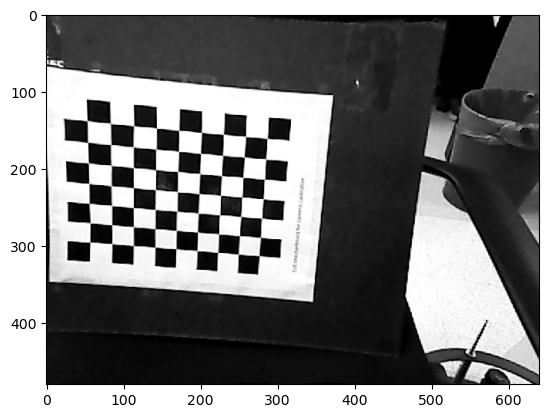

In [2]:
image = cv2.imread(IMG_PATHS[0], 0)
plt.figure()
ax = plt.subplot()
ax.imshow(image, cmap="gray")

#### Exercise 1.2: Compute Homographies and Camera Extrinsics
Now that we can compute a set of corresponding points in the world coordinates and pixel frame coordinates we can compute the homography matrix and, given the camera intrinsics `K` defined at the top of this file, we can compute the extrinsics. In the file `camera_calibration.py`, implement the following functions:
1. `compute_homography` to compute the homography for a given set of point correspondences
2. `compute_extrinsics` to compute the extrinsics $R$ and $t$
3. `transform_world_to_pixel` to transform a point from the world coordinate frame into the pixel frame

Then, run the code below to see the result of your computations to project the world coordinates onto each image!

In [3]:
def plot_image_and_points(img_path, X_w: np.ndarray, Y_w: np.ndarray, K: np.ndarray):
    """
    Transforms 2D points in world coordinates (assuming Z_w=0) to points in pixel coordinates
    and projects them onto the image, and plots the result.

    Args:
        img_path: filepath to load chessboard image
        X_w: (N,) array of points along x-axis in world coordinates 
        Y_w: (N,) array of points along y-axis in world coordinates 
        K: (3, 3) camera intrinsic matrix.
    """
    image = cv2.imread(img_path, 0)
    plt.figure()
    ax = plt.subplot()
    ax.imshow(image, cmap="gray", alpha=0.2)
    ax.set_xlabel("u")
    ax.set_ylabel("v")

    # Plot measured corners
    u_meas, v_meas = generate_chessboard_2D_pixel_coordinates(img_path)
    ax.plot(u_meas, v_meas, "r+")

    # Compute homography and camera extrinsics
    M = compute_homography(u_meas, v_meas, X_w, Y_w)
    R, t = compute_extrinsics(K, M)

    # Compute and plot world points projected onto pixels
    u_proj = np.zeros_like(u_meas)
    v_proj = np.zeros_like(v_meas)
    for i in range(X_w.shape[0]):
        P_world = np.array([X_w[i], Y_w[i], 0.])
        p_proj = transform_world_to_pixel(K, R, t, P_world)
        u_proj[i] = p_proj[0] / p_proj[2]
        v_proj[i] = p_proj[1] / p_proj[2]
    ax.plot(u_proj, v_proj, "b.")

In [4]:
X_w, Y_w, _ = generate_chessboard_3D_world_coordinates()
@interact(i=(0, len(IMG_PATHS) - 1))
def f(i=0):
    plot_image_and_points(IMG_PATHS[i], X_w, Y_w, K)

interactive(children=(IntSlider(value=0, description='i', max=8), Output()), _dom_classes=('widget-interact',)…